# Stock_Price_Prediction ML Model

# 

## 1. IMPORTING PACKAGES AND DATA SET

#####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#

In [2]:
#Storing the path of the dataset and read it using pandas dataframe
data_set_path=r"D:\Notes internship\Minor Project Data set (Stock Price Prediction) (1).xlsx"
data_set=pd.read_excel(data_set_path)
data_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
#Shape of the data_set(rows,columns)
data_set.shape

(1009, 7)

In [4]:
#DataTypes of the Columns 
data_set.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

####

## 2. DATA CLEANING

### Checking for Missing Values

####

In [5]:
#checking missing values using isna() and sum() functions
data_set.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

####

### Checking for Duplicate Values

#####

In [6]:
#Duplicates are cheched using duplicated() function and sum() functions
data_set.duplicated().sum()

0

#

## 3. DATA UNDERSTANDING

#####

In [7]:
data_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [8]:
#This returns the all the colummn index as an array
data_set.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
data_set.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

###

### Date Column 

In [10]:
#creating separate column for day , month and year 
data_set["Day"]=data_set["Date"].dt.day
data_set["Month"]=data_set["Date"].dt.month
data_set["Year"]=data_set["Date"].dt.year

In [11]:
data_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018


#####

In [12]:
#After creating separate columns for date then removing the date column using drop() function
data_set.drop("Date",axis=1,inplace=True)

In [13]:
data_set.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018


##

## CHECKING & HANDLING OUTLIERS

####

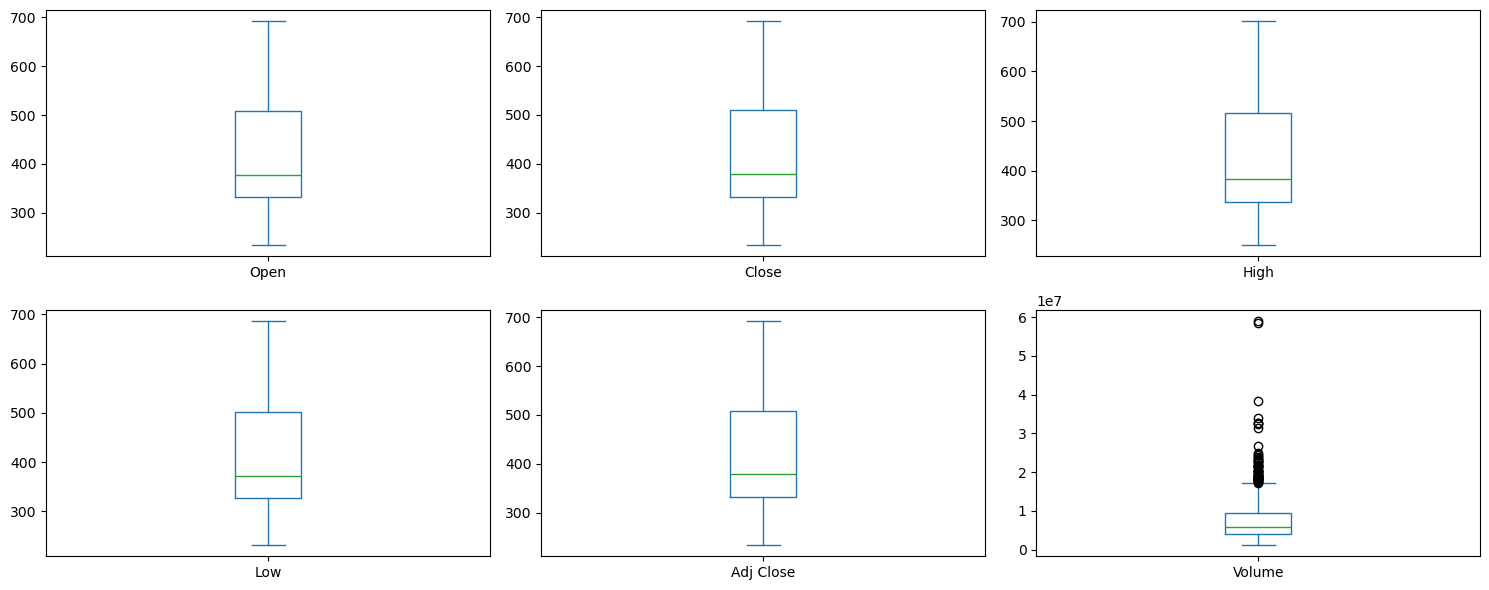

In [14]:
#Creating 6 subplot for ploting boxplot
plt.figure( figsize = (15,6))

#Subplot 1 for Open column
plt.subplot(2,3,1)
data_set["Open"].plot(kind="box")

#subplot 2 for Close Column
plt.subplot(2,3,2)
data_set["Close"].plot(kind="box")

#subplot 3 for High Column
plt.subplot(2,3,3)
data_set["High"].plot(kind="box")

#subplot 4 for Low Column
plt.subplot(2,3,4)
data_set["Low"].plot(kind="box")

#subplot 5 for Adj Close column
plt.subplot(2,3,5)
data_set["Adj Close"].plot(kind="box")

#subplot 6 for Volume Column
plt.subplot(2,3,6)
data_set["Volume"].plot(kind="box")

plt.tight_layout()
plt.show()

#

#### HANDLING OUTLIERS IN VOLUME COLUMN

<Axes: >

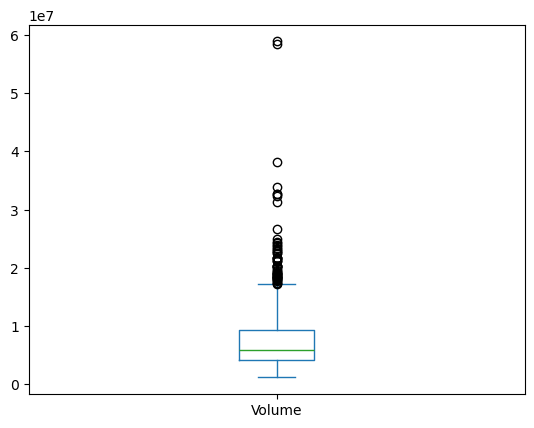

In [15]:
#Plotting the Volume column 
data_set["Volume"].plot(kind='box')

#####

In [16]:
#Calculating IQR and replace outliers values with upper and lower limit values
Q1=data_set['Volume'].quantile(0.25)
Q3=data_set['Volume'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)

######

In [17]:
#Replacing the outliers values
data_set.loc[(data_set['Volume']>upper_limit),'Volume']=upper_limit

data_set.loc[(data_set['Volume']<lower_limit),'Volume']=lower_limit

#####

<Axes: >

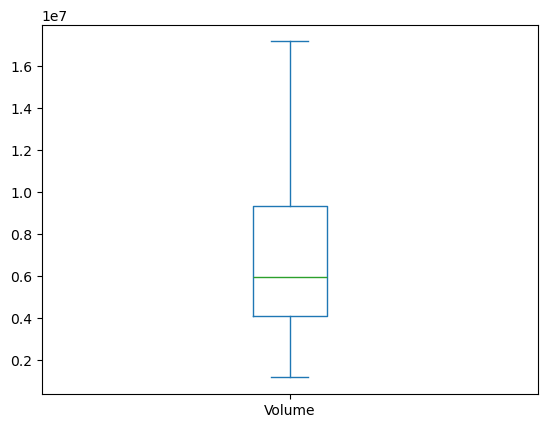

In [18]:
data_set['Volume'].plot(kind='box')

#####

## 4. CREATING ML MODEL USING LINEAR REGRESSION

####

In [19]:
#Changing the predicting Close column to the end of the data_set
col_list = data_set.columns.to_list()
print(col_list,"\n")

t_list = col_list[:3] + col_list[4:] 
t_list.append(col_list[3])
print(t_list,'\n')

data_set = data_set.reindex(columns = t_list)
data_set.head()

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day', 'Month', 'Year'] 

['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Day', 'Month', 'Year', 'Close'] 



,Open,High,Low,Adj Close,Volume,Day,Month,Year,Close
0,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018,254.259995
1,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018,265.720001
2,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018,264.559998
3,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018,250.100006
4,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018,249.470001


#####

### NORMALIZING THE DATA_SET 


#####

In [20]:
#from Scikit-learn importing StandardScaler for normalizing the data_set 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_set=scaler.fit_transform(data_set)
data_set[0]

array([-1.44777164, -1.4414654 , -1.51014126, -1.52204669,  1.11600932,
       -1.22417332, -1.32500464, -1.38099829, -1.52204669])

#####

#### SPLITTING THE DATA_SET 

#####

In [21]:
#from Scikit learn importing train_test_split class for splitting of data_set
from sklearn.model_selection import train_test_split as tts

#X_set contains all the columns except Close Column
x_set = data_set[:,:-1]

#y_set contain the close column 
y_set = data_set[:,-1]

#Splitting the data_Set as 80% for traning and rest 20% for testing
x_train,x_test,y_train,y_test = tts(x_set,y_set,test_size = 0.2,random_state = 89)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(807, 8)
(202, 8)
(807,)
(202,)


####

#### TRAINING THE LINEAR REGRESSION MODEL

#####

In [22]:
#from Scikit learn importing LInearRegression Class for Creating and training the model using train data_set
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#Model is trained using the train data_set
model.fit(x_train,y_train)

LinearRegression()

#####

#### CALCULATING RMSE AND R-SQUARED VALUE

#####

In [23]:
#from Scikit learn importing mean_sqaured_error and r2_score classes
from sklearn.metrics import mean_squared_error , r2_score

#creating a method "metrics" for calculating RMSE and r-sqaured
def metrics(y_true,y_pred):
    print("RMSE :",mean_squared_error(y_true,y_pred)**0.5)
    print("R- SQUARED :",r2_score(y_true,y_pred))

#creating a method to find the accuracy
def accuracy(y_true,y_pred):
    error = abs(y_true - y_pred)
    #Calculating Mean Absolute Percentage Error
    mape = 100 * np.mean(error/y_true)
    accuracy = 100 - mape
    print("Accuracy:",accuracy)

#####

#### TESTING AND EVALUATION

#####

In [24]:
#testing the model using the test data_set
y_pred = model.predict(x_test)

#calling metrics method for RMSE and r-squared
metrics(y_test,y_pred)
#Calling accuracy method for the accuracy
accuracy(y_test,y_pred)

RMSE : 8.438574114764424e-16
R- SQUARED : 1.0
Accuracy: 100.00000000000001


#####